<a href="https://colab.research.google.com/github/EhsanOthman2021/Sachcontrol-Project/blob/main/Sachcontrol_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load dataset from my Google Drive (Please run the code to load dataset and Project Questions) 

In [2]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Import the dataset
link1 = 'https://drive.google.com/file/d/1j1JPpq9bL_kvQXn4Y5DcZDhm4uRzLtCy/view?usp=sharing'
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':'1j1JPpq9bL_kvQXn4Y5DcZDhm4uRzLtCy'}) 
downloaded.GetContentFile('L1_dataset.csv')  

# Import the task Questions 
link2 = 'https://drive.google.com/file/d/1PWT1fXG5R7xg1cbf3BboCJEvIV9053o-/view?usp=sharing'
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':'1PWT1fXG5R7xg1cbf3BboCJEvIV9053o-'}) 
downloaded.GetContentFile('L1_dataset.pdf') 

# Here import the presentation 
link3 = 'https://docs.google.com/presentation/d/1H9jaxktUKFmkqUynAU_79MIAMtE30g2q/edit?usp=sharing&ouid=112632232198988303795&rtpof=true&sd=true'
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':'1H9jaxktUKFmkqUynAU_79MIAMtE30g2q'}) 
downloaded.GetContentFile('Sachcontrol.pptx') 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive._mount('/content/drive')

##Question1: (Please run the code below)

The first step to identifying problems from ‘L1_dataset_Update.csv’ was to analyze the dataset. This dataset includes the invoices input data from insurance policies after negotiating the invoice amount with the Credit Hire Organizations (CHO) on invoices that have failed one or more business rules. The dataset includes 26 variables (features) and 10225 invoices (samples). After investigating the different distributions of the dataset based on different features from datasets, I identified two main problems. 
  
  The first main problem was that classified when the input invoice (1) is correct, (2) needs to check the charge amount, or (3) includes wrong input (some important features values are missing (equal = 0), when InvoiceSavingRule is nan then the original and current features are not identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both). So this problem is a multi_classification task, 0 indicates the correct invoice (called correct class), 1 indicates the invoice which needs to check the ChargeAmount (called Check_ChargeAmount class), and 2 indicates the invoice which includes wrong input (called Wrong_Input). The distribution of the dataset based on the 3 classes is shown in ‘Question1/Main_task.png’. I found this problem based on the correlation between OriginalTotalToPayAmount, CurrentHireGross, and InvoiceSavingRule features. The OriginalTotalToPayAmount and CurrentHireGross are identical when the InvoiceSavingRule was not provided (nan); about 72% (5076 samples) of the samples with nan InvoiceSavingRule. In contrast, the OriginalTotalToPayAmount and CurrentHireGross are not identical when the InvoiceSavingRule was not provided (nan); about 28% (1951 samples) of the samples with nan InvoiceSavingRule. Thus, I identified Check_ChargeAmount class (class 1) to refer to the invoice which needs to check again; such invoices compute the TotalPenaltyChargeAmount with current features costs (such as CurrentHireGross, CurrentRepairGross, CurrentEngineerFeeGross, CurrentTotalLossFeeGross, and CurrentStorageRecoveryGross) when it should not. Further, class 1 refers to the invoice that the OriginalTotalToPayAmount and CurrentHireGross are identical, and InvoiceSavingRule was provided, for about 0.25% (8 samples) of the samples. Such invoices need to check again. 
  
  Additionally, I noticed the correlation between the OriginalTotalToPayAmount and other Original features (Original HireGross, Original RepairGross, Original EngineerFeeGross, Original TotalLossFeeGross, and Original StorageRecoveryGross), OriginalTotalToPayAmount = the summation of other Original features. Moreover, SettledAmount = the summation of other Current features if InvoiceSavingRule is not provided, and SettledAmount = the summation of other Current features + TotalPenaltyChargeAmount if InvoiceSavingRule was provided. Further, many missing values (equal = 0) with OriginalTotalToPayAmount, SettledAmount, and OriginalHireGross, CurrentHireGross features. These features should have values. Thus, I identified Wrong_Input class (class 2) to refer to the invoice, which needs to check the computation or missing values again. Class 2 also indicated when OriginalHireDays and CurrentHireDays features were not identical when the OriginalTotalToPayAmount and SettledAmount were identical and InvoiceSavingRule was not provided (nan). I guessed this was also a mistake based on the dataset pattern. 
  
  All other samples, which are not involved class1 and class2 problems, are identified as a correct class (class 0). The dataset was processed by replacing the nan values feature with 0 and using only the year from DateInvoiceWasUploaded and DateclaimmovedtoInvoicePaymentLogged features (see 'L1_dataset_Update.csv'). The dataset was labeled based on the first main problem; see the identfy_tasks_from_dataset () function in the below code; the dataset was saved into 'L1_dataset_Update1.csv’ (which will use with machine learning models). This function also identify 3 sub-tasks, which will use with Decision Fusion method in Question3: 

1.	Sub-task1 is classified when both OriginalTotalToPayAmount feature and SettledAmount feature are identical and InvoiceSavingRule is nan, see 'Question1/Sub_task1.png'. 
2.	Sub-task2 is classified when there is InvoiceSavingRule or nan, , see 'Question1/Sub_task2.png'. . 
3.	Sub-task3 is classified when there is a problem with invoice input (some important features missing, when TotalPenaltyChargeAmount is nan the original and current features should be identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both), , see 'Question1/Sub_task3.png'.


The machine learning methods were used to solve this problem using this dataset ('L1_dataset_Update1.csv'), see the answer from Questions2,3 for more details. Such a solution will be very helpful for insurance policies to detect the invoices with problems, such as invoices that need to check again the ChargeAmount and invoice which includes wrong input (some important features missing, when TotalPenaltyChargeAmount is nan the original and current features should be identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both).

  The second main problem was identified the performance regarding 4 features, which are CHO categories, Workgroup categories, the person at the insurance company processing the invoice, and DateInvoiceWasUploadedm. The distributions of samples for each feature are shown in 'Question1/CHO chart.png', 'Question1/Workgroup chart.png', 'Question1/InsurerClaimOwner chart.png', 'Question1/DateInvoiceWasUploaded chart.png' .We also presented the worst performance regarding the 4 features in terms of the 3 classes in terms of the first main task, see 'Question1/Second main problem solution.csv'. With this problem, I did not implement machine learning methods. I used two different functions in the code below (dataset_distribution () and dataset_distribution_based_on_tasks()). The dataset_distribution() function was implemented to investigate the different distribution of the dataset based on the 4 features from the dataset, see 'Question1/CHO table.csv', 'Question1/Workgroup table.csv', 'Question1/InsurerClaimOwner table.csv', 'Question1/DateInvoiceWasUploaded table.csv'. I also presented the results of how each category performs with the first main task problem (3 classes); the results are shown in 'Question1/CHO the percentage of class based on the their category or group.png', 'Question1/Workgroup the percentage of class based on the their category or group.png', 'Question1/InsurerClaimOwner the percentage of class based on the their category or group.png', and 'DateInvoiceWasUploaded the percentage of class based on the their category or group.png'. The dataset_distribution_based_on_tasks() function was implemented to investigate the different distribution of dataset regarding the main_task and the 3 sub_tasks, see 'Question1/Main_task.png', 'Question1/Sub_task1.png', 'Question1/Sub_task2.png', and 'Question1/Sub_task3.png'. Such solution will be helpful for insurance policies to detect the worst performance regarding CHO categories, Workgroup categories, the person at the insurance company processing the invoice, DateInvoiceWasUploaded. However, when they see the results, they should consider the size of the data of each category; it is not equal.


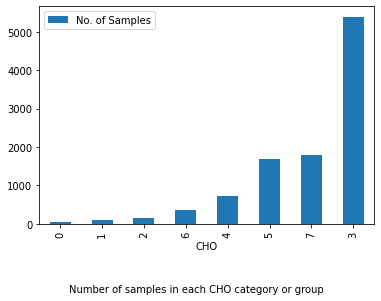

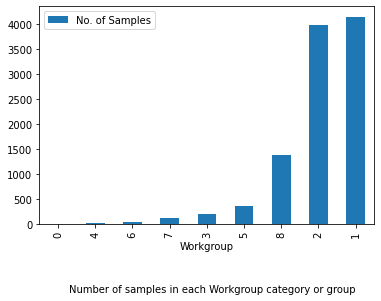

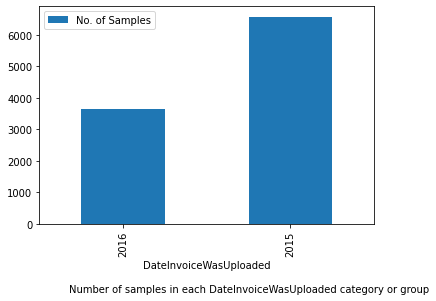

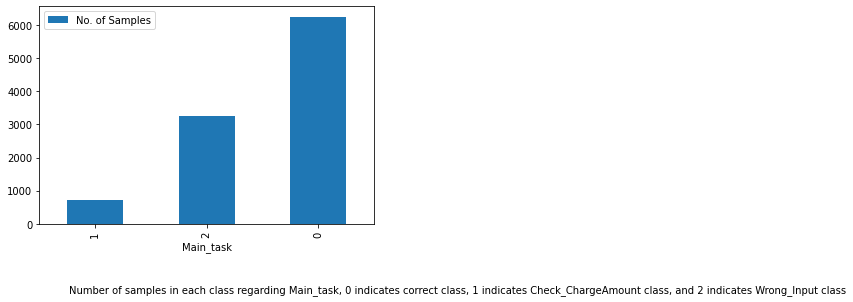

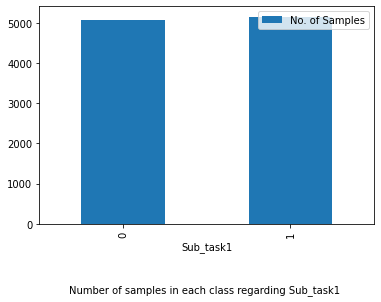

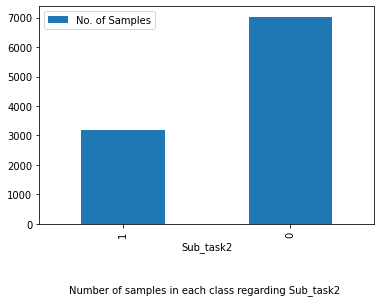

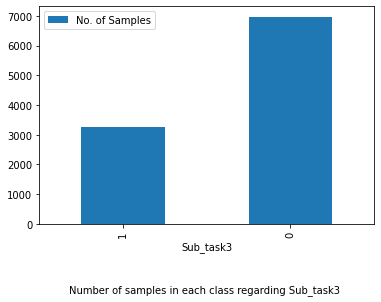

In [ ]:
#/------------------------------------------------------------------------------------------------------------------------------------
# Question1:
###Sachcontrol Project
# Step 1. Define Problems.
# This code shows how : 
# a) Loading the dataset.
# b) Simple processing for dataset.
# c) Investigating the different distribution of dataset based on different variables (features) from datasets.
# d) Define multi_classification problem based on the investigation in c, classify when the input invoice correct or need ... 
#    to check the charge amount or wrong input (some important features missing, when TotalPenaltyChargeAmount ...
#    is nan the original and current features should be identical ,wrong computation  for ...
#    OriginalTotalToPayAmount feature or SettledAmount feature or both).
# e) Define the performance problem regarding 4 features. Regarding the problem in d, I present the ...
#    performance of CHO categories, Workgroup categories, the people at the insurance company processing the ...
#    invoice, DateInvoiceWasUploaded, and identify the worst performance.
#/------------------------------------------------------------------------------------------------------------------------------------

# The libraries that I use to define the problem

import csv
import os
import pandas as pd
import numpy as np
#import dataframe_image as dfi
from collections import Counter
import matplotlib.pyplot as plt

#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to extract the 26 features and 10225 samples from L1_dataset_Update.csv file into the...
#  Dataset.csv, which will be use in this project to solve the problem

def extract_dataset():
    
    # Read from CSV file 
    filename = 'L1_dataset'
    with open(filename +'.csv' ,'rt')as infile:
         data = csv.reader(infile) 
         columnA = list()
         for row in data:
            columnA.append(row[0])

    if not os.path.exists('Question1'):
           os.makedirs('Question1')       
    # Write into CSV file        
    with open('Question1/'+filename +'_Update.csv', 'w', newline='') as outfile:
         row_data = csv.writer(outfile)
         for row in columnA:
             Temp = row.split("|") 
             row_data.writerow(Temp)
             
    return filename       
#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to process the 26 features within 10225 samples by replacing nan values feature into 0 and ...
# using only the year from  DateInvoiceWasUploaded feature and DateclaimmovedtoInvoicePaymentLogged feature.
    
def preprocess_dataset(df):
    
    df=df.fillna(0)
    df['DateInvoiceWasUploaded'] = pd.DatetimeIndex(df['DateInvoiceWasUploaded']).year
    df['DateclaimmovedtoInvoicePaymentLogged'] = pd.DatetimeIndex(df['DateclaimmovedtoInvoicePaymentLogged']).year
    return df

#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to label the samples based on classes based on multi_classification probem which identified after the ...
# investigation the different distribution of dataset based on different variables (features) from datasets and ...
# figure out the correlation between features. 
# I identify 3 sub-tasks, which I use with Decision Fusion method :
# The Sub-task1 is classify when both OriginalTotalToPayAmount feature and SettledAmount feature are identical and ...
# InvoiceSavingRule is nan. 
# The Sub-task2 is classify when there is InvoiceSavingRule or nan.
# The Sub-task3 is classify when there is problem with invoice input (some important features missing, when ... 
# TotalPenaltyChargeAmount is nan the original and current features should be identical ,wrong claclution for ... 
# OriginalTotalToPayAmount feature or SettledAmount feature or both)
    

def identfy_tasks_from_dataset(filename): 
    
    # Load dataset
    filename_read = 'Question1/'+ filename + '_Update' + '.csv'
    df = pd.read_csv(filename_read)
    
    # Preprocess dataset
    df = preprocess_dataset(df)
    
    # Initialzing the Label in the multi_classification problem (The problem = I call it Main_task)
    df['Label'] = 0
    
    # Initialzing the Label in the 3 sub-tasks problems (The problem = I call them Sub-task1, Sub-task2, and Sub-task3)
    df['Label_task1'], df['Label_task2'], df['Label_task3'] = 0, 0, 0
    
    # labeling each samples based on  multi_task and the 3 tasks 
    for i in range(len(df.index)):
        
        # labeling Main_task 
        if ((df.loc[i,'OriginalTotalToPayAmount'] == df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule'] == 0 and round(df.loc[i,'OriginalHireGross'] + df.loc[i,'OriginalRepairGross'] + df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2) == df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount'] == round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'],2) and df.loc[i,'OriginalHireGross'] != 0 and df.loc[i,'CurrentHireGross']!=0 and df.loc[i,'OriginalHireDays'] == df.loc[i,'CurrentHireDays'])or(df.loc[i,'OriginalTotalToPayAmount'] != df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule']!= 0 and round(df.loc[i,'OriginalHireGross'] + df.loc[i,'OriginalRepairGross'] + df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2) == df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount']== round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'] + df.loc[i,'TotalPenaltyChargeAmount'],2) and df.loc[i,'OriginalHireGross'] != 0 and df.loc[i,'CurrentHireGross'] != 0)):
          
           df.loc['Label'] = 0
           
        elif ((df.loc[i,'OriginalTotalToPayAmount'] == df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule'] !=0 and round(df.loc[i,'OriginalHireGross'] + df.loc[i,'OriginalRepairGross'] + df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2) == df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount'] == round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'],2) and df.loc[i,'TotalPenaltyChargeAmount'] !=0 and df.loc[i,'OriginalHireGross'] !=0 and df.loc[i,'CurrentHireGross'] != 0 ) or (df.loc[i,'OriginalTotalToPayAmount'] !=  df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule']==0 and  round(df.loc[i,'OriginalHireGross']+df.loc[i,'OriginalRepairGross']+ df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2)== df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount'] == round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'] + df.loc[i,'TotalPenaltyChargeAmount'],2) and df.loc[i,'TotalPenaltyChargeAmount'] != 0 and df.loc[i,'OriginalHireGross'] !=0 and df.loc[i,'CurrentHireGross'] != 0)):    
           df.loc[i,'Label'] = 1
       
        else : 
              
           df.loc[i,'Label'] = 2
                            
        # labeling Sub_task1
        if(df.loc[i,'InvoiceSavingRule']==0 and df.loc[i,'OriginalTotalToPayAmount']==df.loc[i,'SettledAmount']):
          df.loc[i,'Label_task1'] = 0
        else :
          df.loc[i,'Label_task1'] = 1
          
        # labeling Sub_task2
        if(df.loc[i,'InvoiceSavingRule']==0):
          df.loc[i,'Label_task2'] = 0
        else :
          df.loc[i,'Label_task2'] = 1
          
        # labeling Sub_task3
        if(df.loc[i,'Label']==0 or df.loc[i, "Label"]==1):
          df.loc[i,'Label_task3'] = 0
        else :
          df.loc[i,'Label_task3'] = 1 
     
    df = df[:-1]      
    df.to_csv('Question1/'+ filename + '_Update' + str(1) +'.csv')  
    
    
    return df

#/------------------------------------------------------------------------------------------------------------------------------------
    
# This function is used to show the results of investigating the different distribution of dataset based on different 
# variables (features) from dataset.
# This features are CHO,  Workgroup, InsurerClaimOwner, and DateInvoiceWasUploaded 
    
def dataset_distribution(df):
    
    # Use only 4 features with the label that is identified as multi_classification problem (0 indicates correct invoice, 
    # 1 indicates invoice that needs to check ChargeAmount, and 2 indicates invoice with problems [some important
    # features missing, when TotalPenaltyChargeAmount is nan the original and current features should be identical, wrong computation  
    # for OriginalTotalToPayAmount feature or SettledAmount feature or both])
    
    # Select the 4 features and label from dataset
    sub_df = df[['CHO','Workgroup','InsurerClaimOwner','DateInvoiceWasUploaded']].copy()
    sub_df_class = df[['Label']].copy()
    
    #This list is used to identify each feature values separately to show then its distribution regarding the 3 classes 
    sub_data = list ()
    
   # dislist = list()
    
    # This list is used to identify the 3 classes 
    classes = list(sub_df_class['Label'].unique())
    classes.sort()
       
    # This matrix is used to identify the  worst category performance regading each features (4 features)       
    temp_matrix = np.zeros((sub_df.shape[1], len(classes)))
    str_classes = [str(int) for int in classes]
    
    # This loop to show the distribution regarding the 3 classes for each features (4 features) 
    for i in range(sub_df.shape[1]):
        
        sub_data = sub_df[sub_df.columns[i]].tolist()
        
        # count of samples in each category
        count = list (Counter(sub_data).values())
        # the categories
        key =  list (Counter(sub_data).keys())
        
        # new_df is dataframe to store the categories and the count (number) of samples in each categories and
        # order it based on the number of samples 
        new_df = pd.DataFrame(key, columns=[sub_df.columns[i]])
        new_df.loc[:,'No. of Samples'] = count
        new_df = new_df.sort_values(by=['No. of Samples'])
        
        # Here we save and plot the distribution for each category 
        if sub_df.columns[i]!= 'InsurerClaimOwner' :
          new_df.plot(kind='bar',x=sub_df.columns[i],y=('No. of Samples'))
          plt.annotate(('Number of samples in each '+ sub_df.columns[i] + ' category or group'), (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top')
          plt.savefig('Question1/'+sub_df.columns[i]+' chart.png', dpi=300, bbox_inches='tight')
          new_df.to_csv('Question1/'+sub_df.columns[i]+' table.csv',index=False)  
         # dfi.export(new_df,"Question1/'+sub_df.columns[i]+' table.png')
        else :
          new_df.to_csv('Question1/InsurerClaimOwner.csv',index=False)  
        
        # Add the label into the original dataframe to show how each category perform with the multi_classification problem (3 classes) 
        sub_df.loc[:,'Label'] = df[['Label']]
        
        # Here I extract for each class how each category perfom 
        dis = np.zeros((len(key), len(str_classes)))  
        for j in range(len(classes)):
            for k in range (len(key)):
                temp = sub_df[(sub_df['Label']==classes[j]) & (sub_df[sub_df.columns[i]]==key[k])].count()
                dis[k][j]= round(temp[0]/count[k]*100,2)
        
        # This list is used to convert the shape of the obtained 3D matrix (dis) into 3 sperate lists
        concl = list()
        for ii in range (dis.shape[1]):
            concl.append (dis[:,ii])
            
        # Combine the 3 lists (results of all classed) to insert into another dataframe called dis_df to save the results 
        data_tuples = list(zip(key,concl[0],concl[1],concl[2],count))          
        dis_df = pd.DataFrame(data_tuples, columns=['Id', 'correct','Check_ChargeAmount','Wrong_Input','No of samples'])
        dis_df = dis_df.sort_values(by=['No of samples']) 
        dis_df.to_csv('Question1/'+sub_df.columns[i]+' the percentage of class based on the their category or group.csv', index=False) 
       # dfi.export(dis_df,'Question1/'+sub_df.columns[i]+' the percentage of class based on the their category or group.png')

        # return the index of the highst percentage# for each feature in each class (3) 
        index = dis_df.idxmax()
        temp = dis_df.loc[index[1:-1],['Id']]
        temp = temp.iloc[:,0].tolist()
        temp = np.asarray(temp)
        temp_matrix [i][:]=  temp

    # This list is used to combine the worse category for the 4 feature in each class (3)  
    conclusion = list()
    for iii in range (temp_matrix.shape[1]):
        conclusion.append ( temp_matrix[:,iii])  
        
    # Combine the 3 lists (results of all classed) to insert into another dataframe called conclusion_df to save the results
    data_tuples = list(zip(list(sub_df.columns.values),conclusion[0],conclusion[1],conclusion[2]) )
    conclusion_df = pd.DataFrame(data_tuples, columns=['Variable','correct','Check_ChargeAmount','Wrong_Input'])   
    conclusion_df['correct'] = conclusion_df['correct'].astype(int)
    conclusion_df['Check_ChargeAmount'] = conclusion_df['Check_ChargeAmount'].astype(int)
    conclusion_df['Wrong_Input'] = conclusion_df['Wrong_Input'].astype(int)
    conclusion_df.to_csv('Question1/Second main problem solution.csv',index=False) 
 #   dfi.export(conclusion_df,'Question1/First conclusion.png')
    
    return

#/------------------------------------------------------------------------------------------------------------------------------------

def dataset_distribution_based_on_tasks(df):  
      
# This function is used to show the results of investigating the different distribution of dataset regarding the main_task and the 3 sub_tasks 
# Also I plt and saved the distribution    
    sub_df = df[['Label','Label_task1','Label_task2','Label_task3']].copy()
    sub_df = sub_df.rename(columns={'Label': 'Main_task', 'Label_task1': 'Sub_task1', 'Label_task2': 'Sub_task2', 'Label_task3': 'Sub_task3'})
    
    for i in range(sub_df.shape[1]):
        
        sub_data = sub_df.loc[:,sub_df.columns[i]].tolist() 
        new_df = pd.DataFrame(Counter(sub_data).keys(), columns=[sub_df.columns[i]])
        new_df.loc[:,'No. of Samples'] = Counter(sub_data).values()
        new_df = new_df.sort_values(by=['No. of Samples'])
        new_df.plot(kind='bar',x=sub_df.columns[i],y=('No. of Samples'))
        if i == 0: # main task 
           plt.annotate(('Number of samples in each class regarding ' + sub_df.columns[i] + ', 0 indicates correct class, 1 indicates Check_ChargeAmount class, and 2 indicates Wrong_Input class'), (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top')
        else: 
           plt.annotate(('Number of samples in each class regarding ' + sub_df.columns[i]), (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top')
     
        plt.savefig('Question1/' + sub_df.columns[i]+'.png', dpi=300, bbox_inches='tight')
 
    return


#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to extract the 26 features and 10225 samples from L1_dataset_Update.csv
filename = extract_dataset() 

# Investigating the different distribution of dataset based on different variables (features) from datasets and identifying the problems
df = identfy_tasks_from_dataset(filename)

# Present the different distribution of dataset based on different variables (features) from dataset
dataset_distribution(df)

# Present the different distribution of dataset regarding the main_task and the 3 sub_tasks 
dataset_distribution_based_on_tasks(df)

##Question2: (Please run the code below)

To solve the first main problem, I used the dataset after processing ‘ L1_dataset_Update1.csv’ with 6 different machine learning methods, which are:

    Random Forest classifier (RFc)
    Support Vector Machine (SVM)
    K Nearest Neighbor classifier (KNN)
    Decision Fusion (Late fusion) method (DF) with 3 RFc models (each model for one sub_task, see Question1 for more details about the sub_tasks)
    Neural Network (NN)
    Convolutional_Neural_Network (CNN) All of them performed better than the chance except CNN (guessing = 61% refers to the majority of the vote, which is the correct class), see the answer in Question4 for more details about results.

The input to a machine learning model is a one-dimensional feature vector (26,1). RFc, SVM, KNN, and NN methods are commonly used for many classification tasks when the dataset is labeled (Supervised Machine Learning methods). All of them perform well with the small data size, so I use them because the size of dataset in this project is also small. Further, I used them to investigate the best model which can give us robust performance with the main problem (Main_task) for classifying when the input invoice: (1) is correct, (2) needs to check the charge amount, or (3) includes wrong input (some important features values are missing (equal = 0), when InvoiceSavingRule is nan then the original and current features are not identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both). The problem was mentioned in detail in Question1 answer.

 Random Forest is suited for multiclass problems, and the results confirm this hypothesis, see the results in Question4 answer. Random Forests are comprised of Decision Trees. The more trees it has, the more sophisticated the algorithm is. It selects the best result out of the votes that are pooled by the trees, making it robust. It is used in several applications spanning across different sectors like banking, medicine, e-commerce, etc. Due to the accuracy of its classification, its usage has increased over the years. It is a very powerful method, especially with a small size of data. Further, I used the most important features with several combinations, which were identified by using feature_importances_.argsort() function, but the results did not improve. Therefore, I used all features (26 features). After I checked the results and got the best model, which is the RFc. I decided to implement DF method with RFc to improve the results. The DF method was used on obtained predictions; the predictions of 3 RFc models (each model for one sub_task) were used. DF was implemented by (1) applying XOR on the predictions from Sub-task2 and Sub-task2, and then (2) changing only the predictions from the Sub-task3 model when they are labeled 0 (which means samples (invoice) with no problem) to the XOR prediction results for the same samples. The results were good, but they were not better than RFc, see the results in Question4 answer. It was the second-best method. The CNN with the two-dimensional features can also be inputted into the model. I excluded the sample number feature, and then the total features were 25. I reshaped the 25 features into 5×5 feature dimensional to fit with CNN format input. After training the model, the machine failed to predict the Main_task problem. The reason is that CNN works not well with a small size of data, which is the case in this project.
The general pipeline of main_task problem solution using machine learning methods is shown in ‘Question2/Machine learning methods.png'.


In [ ]:
#Question2: 
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import os
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

if not os.path.exists('Question2'):
       os.makedirs('Question2') 

link1 = 'https://drive.google.com/file/d/1Gf1nKwnakyQYysUC_o4npIqib9u1u_AK/view?usp=sharing'
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':'1Gf1nKwnakyQYysUC_o4npIqib9u1u_AK'}) 
downloaded.GetContentFile('Question2/Machine learning methods.png') 

##Question3: (Please run the code below)

 The folowing code shows the program which implements a solution to problems mentioned above. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:211: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 Random_Forest_classifier report results
                    precision    recall  f1-score   support

           correct       0.89      0.97      0.93       625
Check_ChargeAmount       0.90      0.97      0.93        72
       Wrong_Input       0.92      0.74      0.82       325

          accuracy                           0.90      1022
         macro avg       0.90      0.89      0.89      1022
      weighted avg       0.90      0.90      0.89      1022



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support_Vector_Machine report results
                    precision    recall  f1-score   support

           correct       0.74      0.85      0.80       625
Check_ChargeAmount       0.43      0.08      0.14        72
       Wrong_Input       0.63      0.57      0.60       325

          accuracy                           0.71      1022
         macro avg       0.60      0.50      0.51      1022
      weighted avg       0.69      0.71      0.69      1022



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K_Neighbors_Classifier report results
                    precision    recall  f1-score   support

           correct       0.75      0.90      0.82       625
Check_ChargeAmount       0.52      0.19      0.28        72
       Wrong_Input       0.74      0.56      0.64       325

          accuracy                           0.74      1022
         macro avg       0.67      0.55      0.58      1022
      weighted avg       0.73      0.74      0.72      1022



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:211: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:211: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:211: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Decision_Fusion_RFc report results
                    precision    recall  f1-score   support

           correct       0.89      0.96      0.92       625
Check_ChargeAmount       0.75      0.97      0.85        72
       Wrong_Input       0.92      0.72      0.81       325

          accuracy                           0.88      1022
         macro avg       0.85      0.88      0.86      1022
      weighted avg       0.89      0.88      0.88      1022



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/1000
18/18 [==============================] - 1s 2ms/step - loss: 1.2543 - accuracy: 0.0798
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1561 - accuracy: 0.2244
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.0835 - accuracy: 0.5486
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.0220 - accuracy: 0.5967
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.6075
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.9165 - accuracy: 0.6108
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.6111
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.6111
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.6115
Epoch 10/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.6122

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/18 [==============================] - 1s 4ms/step - loss: 1.0531 - accuracy: 0.6110
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.9536 - accuracy: 0.6110
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8804 - accuracy: 0.6110
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8562 - accuracy: 0.6110
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8533 - accuracy: 0.6110
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8533 - accuracy: 0.6110
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8531 - accuracy: 0.6111
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8529 - accuracy: 0.6111
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8530 - accuracy: 0.6111
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8528 - accuracy: 0.6111
Epoch 11/100
18/18 [=

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


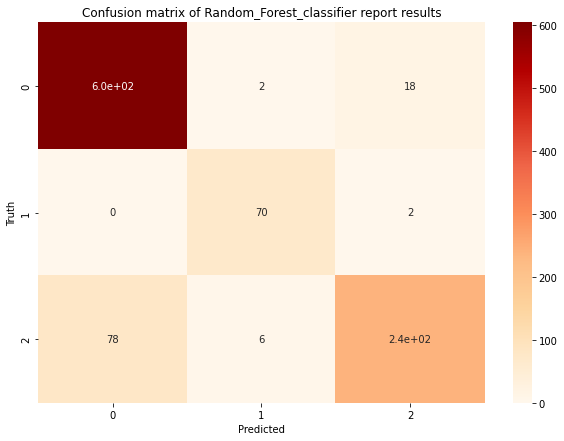

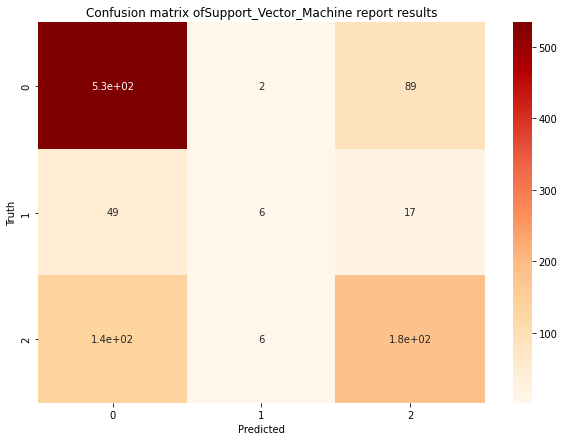

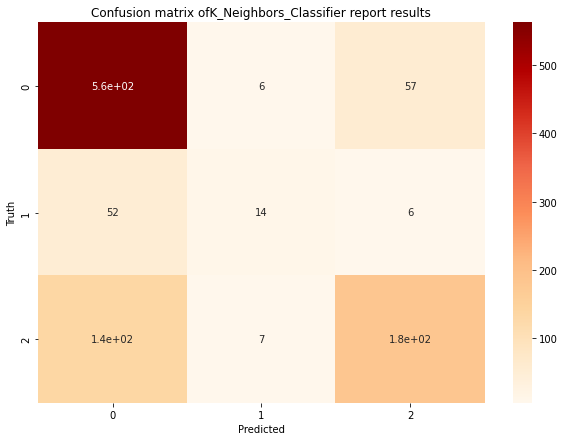

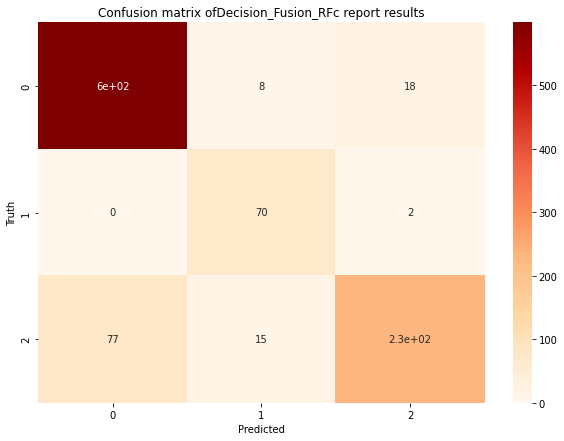

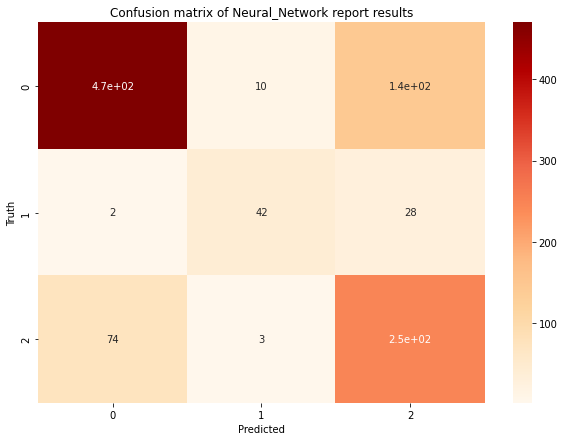

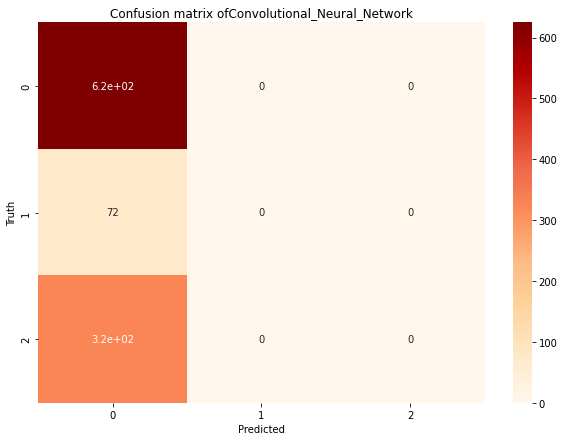

In [ ]:
#/------------------------------------------------------------------------------------------------------------------------------------
# Question3:
###Sachcontrol Project
# Step 2. Prepare Data.
# Step 3. Apply Machine Learning Methods.
# Step 4. Present and Evaluate Results.

#Note: this code to solve the first main problem: classifywhen the input invoice (1) is correct, (2) needs to check the charge amount, 
# or (3) includes wrong input (some important features values are missing (equal  =  0), when InvoiceSavingRule is nan then the original
# and current features are not identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both).   
#/------------------------------------------------------------------------------------------------------------------------------------

# The libraries that I use to define the problem
import csv
import pandas as pd
import random
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from tensorflow import keras
import tensorflow as tf


from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
#import dataframe_image as dfi



#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to split the dataset into 90% of the data for training and 10% of the data for testing, 
# Note: I was careful when I split the dataset to be sure that the models have samples for each class. The same percentage of selected
# samples were used with each class. A randomly samples were selected from each class samples based on selected split. 

def split_dataset(df,classes, ratio, output):
    
    # Set random seeds to be sure the same splits with the same samples are used for reliable comparison between methods
    random.seed(42)
    
    # load the dataset 
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # List to save all samples index 
    Index_label= list ()
    
    # Lists to save testing and training samples index after selecting them randomaly based on ratio (0.10) 
    test_index_label= list ()
    train_index_label = list ()
    
    # Loop to select the samples randomaly based on ratio (0.10), selecting the indexs
    for i in range (len(classes)):
        Index_label.append ( df[df[output]== classes[i]].index.tolist())
        test_index_label.append( random.sample(Index_label[i], round(len(Index_label[i])*ratio)))
        train_index_label.append ([item for item in Index_label[i] if item not in test_index_label[i]])
        
    # Use list comprehension to convert a list of lists to a flat list 
    test_index_flatList = [ item for elem in test_index_label for item in elem] 
    train_index_flatList = [ item for elem in train_index_label for item in elem] 
    train_index_flatList = [x for x in train_index_flatList if not isinstance(x, str)] 
    
    # Sort the indexes of samples
    test_index_flatList.sort()
    train_index_flatList.sort()
    
    # Load the samples into testing and training sets based on selected indexs, I split the label from features to fit with methods input format  
    Xtest = df.loc[test_index_flatList, ~df.columns.isin(['Label','Label_task1', 'Label_task2', 'Label_task3'])]
    Ytest = df.loc[test_index_flatList, df.columns == output]
    Xtrain = df.loc[train_index_flatList, ~df.columns.isin(['Label','Label_task1', 'Label_task2', 'Label_task3'])]
    Ytrain = df.loc[train_index_flatList, df.columns == output]


    return  Xtest, Ytest, Xtrain, Ytrain,  train_index_flatList , test_index_flatList

#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to be sure that I selected the samples with with sub_tasks are the same as those used with main tasks 
    
def same_split_dataset(df,classes, ratio, output, train_index_flatList , test_index_flatList):
   
   # load the dataset  
   df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
   
   # Load the samples into testing and training sets based on selected indexs, I split the label from features to fit with methods input format  
   Xtest = df.loc[test_index_flatList, ~df.columns.isin(['Label','Label_task1', 'Label_task2', 'Label_task3'])]
   Ytest = df.loc[test_index_flatList, df.columns == output]
   Xtrain = df.loc[train_index_flatList, ~df.columns.isin(['Label','Label_task1', 'Label_task2', 'Label_task3'])]
   Ytrain = df.loc[train_index_flatList, df.columns == output]
   
   return  Xtest, Ytest, Xtrain, Ytrain

#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to convert features to numpy, the machine learning input should be array  
   
def data_as_numpy_format(df):
    
    data = df.to_numpy()
    
    return  data
    
    
#/------------------------------------------------------------------------------------------------------------------------------------

# This function normalizes each features values separately, each feature has different range 
    
def normalization_features(df):
    
    feature = list(df.columns.values)
    
    for i in range (len (feature)):
        df[feature[i]] = (df[feature[i]] - df[feature[i]].min()) /(df[feature[i]].max()-df[feature[i]].min())
    
    # features as numpy format (array)
    features = data_as_numpy_format(df)
    
    return features


#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to sort the features based on thier importance after applying feature_importances_.argsort() with RFc...
# The first columns are the most important features.
    
def sort_features(Xtrain_set, sorted_idx): 
    
    temp = np.zeros((Xtrain_set.shape[0], Xtrain_set.shape[1]))
    for i in range(len(sorted_idx)):
        
        temp[:,i] = Xtrain_set[:, sorted_idx[i]]
    
    Xtrain_set = temp
    
    return Xtrain_set

#/------------------------------------------------------------------------------------------------------------------------------------

# prepare the dataset by splitting it into training and testing datasets interms of main task
    
def Prepare_Dataset(df, output):
   
    ratio = 0.10
    classes = list (df['Label'].unique())
    
    # call splitting set function
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList = split_dataset(df, classes, ratio, output)
        
    # Features  normalization (main task)
    Xtrain_set = normalization_features(Xtrain_set) 
    Xtest_set = normalization_features(Xtest_set)
    
    # label as numpy format (array)
    Ytrain_set = data_as_numpy_format(Ytrain_set)
    Ytest_set = data_as_numpy_format(Ytest_set)
    
    return Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList

#/------------------------------------------------------------------------------------------------------------------------------------

# This function to prepare the dataset by splitting it into training and testing datasets in terms of sub_tasks 
    
def Sub_Task_Prepare_Dataset(df,train_index_flatList, test_index_flatList,output,sub_task):
    
    ratio = 0.10
    classes = list (df['Label'].unique())
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set = same_split_dataset(df,classes, ratio, output, train_index_flatList , test_index_flatList)
        
   # Over weighting sub_task3
   # Calculate num_to_oversample: how many extra copies of the minority class do we need to balance the data
   # Generate samples from the minority class training data, with replacement
   # Concatenate the new sample and the original training dataset
   # However, after applying Over weighting sub_task3, the results was not increased   
    
 #   if sub_task == 3:
 #      msk = Ytrain_set == 1
 #      num_to_oversample = len(Ytrain_set) - 2*msk.sum()
 #      df_positive_oversample_Ytrain_set = Ytrain_set[msk].sample(n= Ytrain_set.shape[0], replace=True, random_state=42)
 #      index_to_duplicate = df_positive_oversample_Ytrain_set.index[df_positive_oversample_Ytrain_set[output] == True].tolist()
 #      Xtrain_duplicate = Xtrain_set.loc[index_to_duplicate, :]
 #      Ytrain_duplicate = Ytrain_set.loc[index_to_duplicate,:]
 #      Xtrain_set = Xtrain_set.append(Xtrain_duplicate)
 #      Ytrain_set = Ytrain_set.append(Ytrain_duplicate)
       
    # Features  normalization (sub_tasks)
    Xtrain_set = normalization_features(Xtrain_set) 
    Xtest_set = normalization_features(Xtest_set)       
      
    
    # label as numpy format (array)
    Ytrain_set = data_as_numpy_format(Ytrain_set)
    Ytest_set = data_as_numpy_format(Ytest_set)
    
    
    return Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set
    
#/------------------------------------------------------------------------------------------------------------------------------------

# This function to train the models of each machine learning methods separately 
    
def Train_Test_Evaluation(Xtest_set, Ytest_set, Xtrain_set, Ytrain_set, classifier):
    
    classifier.fit(Xtrain_set, Ytrain_set)
    predictions = classifier.predict(Xtest_set)
    
    return predictions
    
#/------------------------------------------------------------------------------------------------------------------------------------

#  This function to show and save the results of the main task
    

def Show_Save_Results(Ytest_set, predictions, no_model):
    
    if no_model == 1:
        model_name =' Random_Forest_classifier report results'
    if no_model == 2:
        model_name = 'Support_Vector_Machine report results'
    if no_model == 3:
        model_name =  'K_Neighbors_Classifier report results'
    if no_model == 4:
        model_name = 'Decision_Fusion_RFc report results'
    if no_model == 5:
        model_name =' Neural_Network report results'
    if no_model == 6:
        model_name = 'Convolutional_Neural_Network'

    #print(confusion_matrix(Ytest_set, predictions))
    
    # plot the confusion_matrix
    cm = confusion_matrix(Ytest_set, predictions)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True,cmap="OrRd")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion matrix of' + model_name 
              )
    if not os.path.exists('Question3&4'):
       os.makedirs('Question3&4') 

    # save the confusion_matrix
    plt.savefig('Question3&4/Confusion_matrix  '+ model_name +' chart.png', dpi=300, bbox_inches='tight')
    
            
    # target_names indicates the 3 classes 
    target_names = ['correct','Check_ChargeAmount','Wrong_Input']
    
    # report store the results of precision, recall, f1-score, accuracy, macro avg, and weighted avg  
    report = classification_report(Ytest_set, predictions, target_names= target_names)
    
    print (model_name)
    print(report)
    
    # create Question3&4 folder if it is not exist
    if not os.path.exists('Question3&4'):
       os.makedirs('Question3&4')
       
    # save report results in Question3&4
    report_path = 'Question3&4/Results of '+ model_name +'.txt'
    text_file = open(report_path, "w")
    n = text_file.write(report)
    text_file.close()


    return predictions
#/------------------------------------------------------------------------------------------------------------------------------------

#  This function to show the implementation of RFc method with main task 
    
def Random_Forest_classifier(df,no_model):
        
    ## Main task using RFc
    
    output = 'Label'
    
    # prepare  dataset
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList = Prepare_Dataset(df, output)
    
    # Select the method 
    classifier  = RandomForestClassifier(n_estimators = 1000, random_state = 42)

    
    #important features, it tried it but the results of RFc were not improved  
    
    #sorted_idx = rf.feature_importances_.argsort() 
    #Xtrain_set = sort_features(Xtrain_set, sorted_idx) 
    #Xtest_set = sort_features(Xtest_set, sorted_idx) 
    #classifier.fit(Xtrain_set[:,:-3], Ytrain_set)
    
    # Train and test the model 
    predictions = Train_Test_Evaluation(Xtest_set, Ytest_set, Xtrain_set, Ytrain_set, classifier)
    
    # show and save the results of confusion matrix, precision, recall, f1-score, accuracy, macro avg, and weighted avg 
    Show_Save_Results(Ytest_set, predictions,no_model)
    
    return  train_index_flatList, test_index_flatList, predictions
        
#/------------------------------------------------------------------------------------------------------------------------------------
    
#  This function to show the implementation of RFc method with sub_tasks to use them the with Decision_Fusion
    
def Sub_task_RFc(df,train_index_flatList, test_index_flatList,output,sub_task):
        
    ## sub_tasks using RFc
    
    # prepare  dataset
    # Use the output from main_task
    _ , Ytest_set_main_task,_ , _ , _ , _ = Prepare_Dataset(df, 'Label')   
    #Use the output from sub_tasks
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set = Sub_Task_Prepare_Dataset(df,train_index_flatList, test_index_flatList,output,sub_task)

    # Select the method 
    classifier  = RandomForestClassifier(n_estimators = 1000, random_state = 42)
    
    # Train and test the model 
    predictions = Train_Test_Evaluation(Xtest_set, Ytest_set, Xtrain_set, Ytrain_set, classifier)
    
    return predictions, Ytest_set_main_task
    
#/------------------------------------------------------------------------------------------------------------------------------------
  
#  This function to show the implementation of SVM method with main task
    
def Support_Vector_Machine(df,no_model):
         ## Main task using RFc

    # prepare  dataset
    output = 'Label'
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList = Prepare_Dataset(df, output)
     
     # Select the method 
    classifier  = svm.SVC()

    # Train and test the model 
    predictions = Train_Test_Evaluation(Xtest_set, Ytest_set, Xtrain_set, Ytrain_set, classifier)
    
    # show and save the results of confusion matrix, precision, recall, f1-score, accuracy, macro avg, and weighted avg 
    Show_Save_Results(Ytest_set, predictions,no_model)
    
#/------------------------------------------------------------------------------------------------------------------------------------
  
#  This function to show the implementation of KNN method with main task
    
def K_Neighbors_Classifier(df,no_model):
         ## Main task using RFc

     # prepare  dataset
    output = 'Label'
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList = Prepare_Dataset(df, output)
     
    # Select the method 
    classifier  = KNeighborsClassifier(n_neighbors=5)
    
    # Train and test the model 
    predictions = Train_Test_Evaluation(Xtest_set, Ytest_set, Xtrain_set, Ytrain_set, classifier)
    
    # show and save the results of confusion matrix, precision, recall, f1-score, accuracy, macro avg, and weighted avg 
    Show_Save_Results(Ytest_set, predictions,no_model)
    
#/------------------------------------------------------------------------------------------------------------------------------------

#  This function to show the implementation of late fusion (Decision_Fusion) method with main task
    
def Decision_Fusion_RFc(df,train_index_flatList, test_index_flatList,no_model):
    
    # n indicates number of models obtained from sub tasks 
    n = 3 
    
    All_predictions= list()
    
    # Loop to apply Rfc on each sub_tasks and obtain the results from each model 
    for i in range (1,n+1):
       output = 'Label_task'+str(i)
       predictions, Ytest_set_main_task = Sub_task_RFc(df,train_index_flatList, test_index_flatList,output,i)
       All_predictions.append(predictions)
       
    # Apply late fusion (Decision fusion) 
    XOR_Task1_Task2 = np.bitwise_xor(All_predictions[:][0],All_predictions[:][1])
    predictions_DF = np.zeros((XOR_Task1_Task2.shape[0], 1))
    All_predictions =  np.array(All_predictions).T
    for i in range (XOR_Task1_Task2.shape[0]):
         if All_predictions[i][2] == 0:
            predictions_DF[i] = int(XOR_Task1_Task2[i])
         elif All_predictions[i][2] == 1:
            predictions_DF[i] = 2
    # show and save the results of confusion matrix, precision, recall, f1-score, accuracy, macro avg, and weighted avg     
    Show_Save_Results(Ytest_set_main_task, predictions_DF,no_model)
    
#/------------------------------------------------------------------------------------------------------------------------------------
       
#  This function to show the implementation of NN method with main task

def Neural_Network(df,train_index_flatList, test_index_flatList,no_model):
    
    # prepare  dataset
    output = 'Label'
    
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList = Prepare_Dataset(df, output)
    Ytrain_set = tf.keras.utils.to_categorical(Ytrain_set)
    
    # Train and test the NN model 
    # Set learning rate and optimizer 
    INIT_LR1 = 1e-2
    adam = keras.optimizers.Adam(lr=INIT_LR1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(12, input_dim=Xtrain_set.shape[1], activation='relu'))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(Xtrain_set, Ytrain_set, epochs=1000, batch_size=512)
    
    # save model in current model 
    model.save('Question3&4/Neural_Network'+'.h5')
    
    # load model 
    # model = models.load_model('Neural_Network.h5')
    scores = model.predict(Xtest_set)
    predictions = scores.argmax(axis=1)
    predictions = predictions.reshape(predictions.shape[0], 1)
    
    # show and save the results of confusion matrix, precision, recall, f1-score, accuracy, macro avg, and weighted avg 
    Show_Save_Results(Ytest_set, predictions,no_model)
    

    
#/------------------------------------------------------------------------------------------------------------------------------------

# To reshape features input into 5 x 5 to fit with CNN method
    
def Features2D(data):    
    
    Features = np.zeros((data.shape[0],5,5))
    for i in range (data.shape[0]):
        temp = data[i][:]
        temp = temp.reshape(5,5)
        Features[i,:,:] = temp
        data = Features  
        data = data.reshape(data.shape[0],5,5,1)       
    return data

#/------------------------------------------------------------------------------------------------------------------------------------

#  This function to show the implementation of CNN method with main task
    
def Convolutional_Neural_Network(df,train_index_flatList, test_index_flatList,no_model):
    
    # prepare  dataset
    output = 'Label'
    
    Xtest_set, Ytest_set, Xtrain_set,  Ytrain_set, train_index_flatList, test_index_flatList = Prepare_Dataset(df, output)
    Ytrain_set = tf.keras.utils.to_categorical(Ytrain_set)
    
    Xtrain_set = Features2D(Xtrain_set)
    Xtest_set = Features2D(Xtest_set)
    
    # Train and test the CNN model 
    # Set learning rate and optimizer 
    INIT_LR1 = 1e-2
    adam = keras.optimizers.Adam(lr=INIT_LR1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    input_shape = (Xtrain_set.shape[1], Xtrain_set.shape[2], 1) 
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(12, kernel_size=(2, 2),activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
   # model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(8, activation='relu'))
   # model.add(Dropout(0.5))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    model.fit(Xtrain_set, Ytrain_set, epochs=100, batch_size=512)
    # save model in current model 
    model.save('Question3&4/Convolutional_Neural_Network'+'.h5')
    
    # load model 
    # model = models.load_model('Neural_Network.h5')
    
    scores = model.predict(Xtest_set)
    predictions = scores.argmax(axis=1)
    predictions = predictions.reshape(predictions.shape[0], 1)
    
    # show and save the results of confusion matrix, precision, recall, f1-score, accuracy, macro avg, and weighted avg 
    Show_Save_Results(Ytest_set, predictions,no_model)
    

#/------------------------------------------------------------------------------------------------------------------------------------

#  This function shows the testing set prediction of using RFc (best model) compared to the ground truth label to give an idea of how this model performs.
#  The results saved on cvs file 'Show_test_set_results_after_applying_RFc.csv'.
    
def Show_test_set_results_after_applying_RFc(df, predictions):   
   
   Temp = df.loc[test_index_flatList,~df.columns.isin(['Label_task1', 'Label_task2', 'Label_task3'])]
   dftest_set_outputs = Temp
   dftest_set_outputs['Prediction'] = predictions
   dftest_set_outputs = dftest_set_outputs.iloc[: , 1:]
   dftest_set_outputs = dftest_set_outputs.replace(to_replace={'Label':{0:'Correct', 1:'Check_ChargeAmount',2:'Wrong_Input'}, 'Prediction':{0:'Correct', 1:'Check_ChargeAmount',2:'Wrong_Input'} }) #,'Check_ChargeAmount','Wrong_Input'
   dftest_set_outputs.to_csv('Question3&4/First_main_problem_solution_after_applying_RFc.csv', index =False) 

#/------------------------------------------------------------------------------------------------------------------------------------

# Load the dataset
filename_read = 'Question1/L1_dataset_Update1.csv'
df = pd.read_csv(filename_read)


# Machine learning Methods 
train_index_flatList, test_index_flatList,predictions= Random_Forest_classifier(df,1)
Support_Vector_Machine(df,2)
K_Neighbors_Classifier(df,3)
Decision_Fusion_RFc(df,train_index_flatList, test_index_flatList,4)
Neural_Network(df,train_index_flatList, test_index_flatList,5)
Convolutional_Neural_Network(df,train_index_flatList, test_index_flatList,6)

# Show the results of the testing set prediction when using RFc (best model) compared to the ground truth label to give an idea of how this model performs.
Show_test_set_results_after_applying_RFc(df, predictions)

##Question4: (Please run the code below)

To ensure that my models are as good as possible, I applied the model to the testing dataset, which samples have never been seen before (testing set). With preparing dataset step, the dataset was split into two sets training set (90% of samples) and testing set (10% of samples). When I split the dataset, I was careful that I used samples from each class with respect to the split percentage. Random samples were selected from each class based on the selected split (90% for training and 10% for testing for each class). Thus, all models except CNN performed better than the guessing (61%) on testing set. CNN perform bad with small datasize. The best results were obtained from RFc in terms of precision, recall, f1-score, accuracy, macro avg, and weighted avg measurements. The classification models were evaluated using precision, recall, and F1-score, which are useful when datasets vary in size (aggregate the contributions of all classes to compute the average metric). The results shows that RFc is the best model in terms of all measurements. The results of each model individually are shown in .txt files in the Question4 folder. Further, the confusion matrixs for each model are presented in .png files in the Question4 folder. The comparison results are present in Best_model.png interms of Micro average the 4 measurements (precision, recall, f1-score, and accuracy). The results of comparing the testing set prediction when using RFc (best model) to the ground truth label are shown in ‘First_main_problem_solution_after_applying_RFc.csv‘ in Question4 folder, this file is introduced to give an idea of how this model performs.


In [ ]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import os
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

if not os.path.exists('Question3&4'):
       os.makedirs('Question3&4')

link = 'https://drive.google.com/file/d/1mmh3gqxg7CtGRuVDAc6kYRR00cBAcgt8/view?usp=sharing'
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':'1mmh3gqxg7CtGRuVDAc6kYRR00cBAcgt8'}) 
downloaded.GetContentFile('Question3&4/Best_model.png')